In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import os
import sys

In [172]:
os.getcwd()

'/Users/saral/Documents/cricket/cricket_gardens/Articles/Fab 4 Median Comparision/Notebooks'

In [173]:
root_dir = Path.cwd().parent.parent.parent

In [174]:
sys.path.append(str(root_dir))


In [175]:
data_dir = root_dir / "Datasets/Player data/Batting"
img_dir = root_dir / "Articles/Fab 4 Median Comparision/Output"

In [97]:
# import all the data from the four players, Smith, Kohli, Root, Williamson
smith_data = pd.read_excel(data_dir / "Smith_Steven.xlsx")
kohli_data = pd.read_excel(data_dir / "Kohli_Virat.xlsx")
root_data = pd.read_excel(data_dir / "Root_Joe.xlsx")
williamson_data = pd.read_excel(data_dir / "Williamson_Kane.xlsx")


In [98]:
player_dfs = {
    "Smith": smith_data,
    "Kohli": kohli_data,
    "Root": root_data,
    "Williamson": williamson_data
}

In [99]:
# clean the datasets using the clean function from data_cleaner.py
from Analytics_app.data_cleaner import BatsmanDataCleaner

In [100]:
print(player_dfs['Smith'].shape)
print(player_dfs['Kohli'].shape)
print(player_dfs['Root'].shape)
print(player_dfs['Williamson'].shape)

(224, 14)
(219, 16)
(295, 14)
(191, 14)


In [101]:
for name, df in player_dfs.items():
    cleaner = BatsmanDataCleaner(df)
    player_dfs[name] = cleaner.run_standard_pipeline()
    print(f"{name} data cleaned., shape: {player_dfs[name].shape}")

Smith data cleaned., shape: (224, 17)
Kohli data cleaned., shape: (219, 19)
Root data cleaned., shape: (295, 17)
Williamson data cleaned., shape: (191, 17)


In [102]:
player_dfs['Smith'].head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Test number,100s,50s,NO
0,1.0,5,7,0.0,0.0,14.28,8,lbw,1,NaN,Pakistan,Lord's,2010-07-13,1963,0,0,0
1,12.0,32,17,1.0,0.0,70.58,9,lbw,3,NaN,Pakistan,Lord's,2010-07-13,1963,0,0,0
2,10.0,9,8,2.0,0.0,125,8,bowled,1,NaN,Pakistan,Leeds,2010-07-21,1965,0,0,0
3,77.0,130,100,9.0,2.0,77,8,bowled,3,NaN,Pakistan,Leeds,2010-07-21,1965,0,1,0
4,7.0,46,37,0.0,0.0,18.91,6,caught,1,NaN,England,W.A.C.A,2010-12-16,1984,0,0,0


In [103]:
import math

# Average (rounded down)

print("Average Runs")
for name in ['Smith', 'Kohli', 'Williamson', 'Root']:
    df = player_dfs[name]

    # Exclude DNB / blank innings
    batted_df = df[df['Runs'].notna()]

    runs_sum = batted_df['Runs'].sum()
    outs = batted_df.shape[0] - batted_df['NO'].sum()
    dnb_innings = df['Runs'].isnull().sum()
    avg = runs_sum / outs if outs > 0 else 0
    avg_floor = math.floor(avg * 100) / 100  # round down to 2 decimals

    print(f"{name}: {avg_floor:.2f}")


print("\nTrue Average Runs")
for name in ['Smith', 'Kohli', 'Williamson', 'Root']:
    df = player_dfs[name]
    batted_df = df[df['Runs'].notna()]
    mean_val = batted_df['Runs'].sum()/batted_df.shape[0]
    mean_floor = math.floor(mean_val * 100) / 100
    print(f"{name}: {mean_floor:.2f}")

print("\nMedian Runs")
for name in ['Smith', 'Kohli', 'Williamson', 'Root']:
    df = player_dfs[name]
    batted_df = df[df['Runs'].notna()]
    median_val = (batted_df['Runs'].median())
    print(f"{name}: {median_val}")


Average Runs
Smith: 56.02
Kohli: 46.85
Williamson: 54.88
Root: 51.29

True Average Runs
Smith: 49.41
Kohli: 43.95
Williamson: 49.87
Root: 47.02

Median Runs
Smith: 33.0
Kohli: 23.0
Williamson: 32.0
Root: 29.0


In [156]:

def plot_player_bar(name, df):
    # Ensure correct datatypes
    batted_df = df[df['Runs'].notna()]
    runs = batted_df['Runs'].astype(float)
    batted_df['Start Date'] = pd.to_datetime(batted_df['Start Date'], errors='coerce')
    med = runs.median()

    # Colors for bars
    colors = runs.apply(lambda x: 'green' if x > med else ('white' if x == med else 'red'))

    # First/last match dates
    start_date = df['Start Date'].min().strftime('%b %Y') if not pd.isna(df['Start Date'].min()) else "Unknown"
    end_date = df['Start Date'].max().strftime('%b %Y') if not pd.isna(df['Start Date'].max()) else "Unknown"

    # Count of unique Tests
    num_tests = df['Test number'].nunique() if 'Test number' in df.columns else None

    # Plot
    plt.figure(figsize=(13, 4))
    plt.bar(range(len(runs)), runs.values, color=colors, edgecolor='black', linewidth=0.6)
    plt.axhline(med, color='gray', linestyle='--', lw=1.2, alpha=0.7)

    # Title and labels
    title_text = f"{name} — Runs by Innings (Median: {med:.0f})"
    if num_tests:
        title_text += f" | No. of Tests: {num_tests}"

    plt.title(title_text, fontsize=14, fontweight='bold')
    plt.xlabel(f"Innings Number\n({start_date} → {end_date})", fontsize=11, labelpad=10)
    plt.ylabel("Runs")

    # Grid and layout
    plt.grid(alpha=0.2, axis='y')

    # Start/end date annotations at edges
    plt.text(0, -max(runs)*0.08, start_date, ha='left', va='top', fontsize=9, color='gray')
    plt.text(len(runs)-1, -max(runs)*0.08, end_date, ha='right', va='top', fontsize=9, color='gray')

    plt.tight_layout()
    plt.savefig(img_dir /f"{name}_runs_bar_chart.png", dpi=300, bbox_inches='tight', transparent=True)
    plt.show()


/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_35785/729812944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batted_df['Start Date'] = pd.to_datetime(batted_df['Start Date'], errors='coerce')


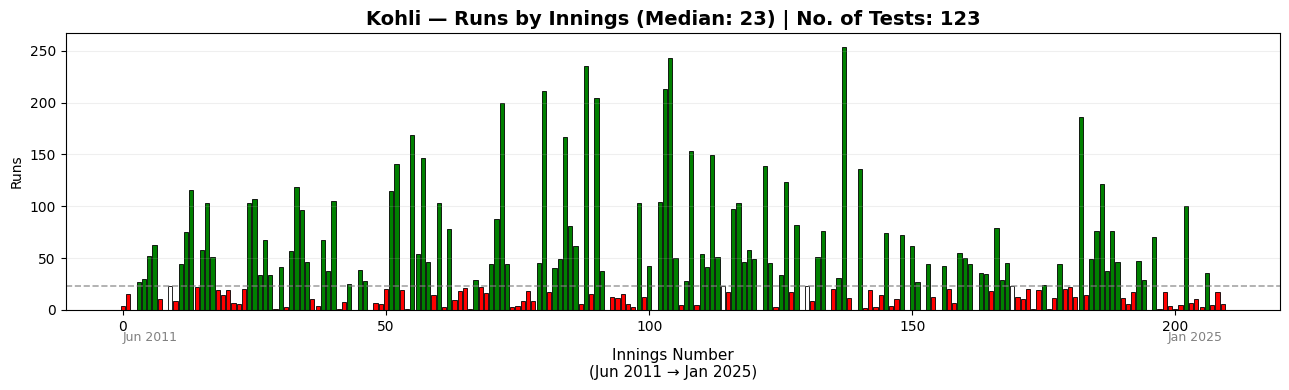

In [157]:
plot_player_bar('Kohli',player_dfs['Kohli'])


/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_35785/729812944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batted_df['Start Date'] = pd.to_datetime(batted_df['Start Date'], errors='coerce')


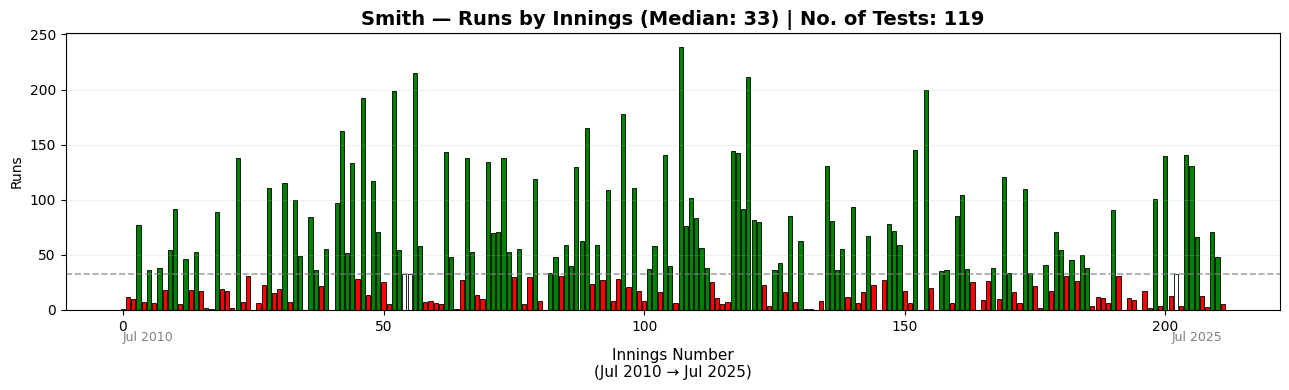

In [158]:
plot_player_bar('Smith',player_dfs['Smith'])


/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_35785/729812944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batted_df['Start Date'] = pd.to_datetime(batted_df['Start Date'], errors='coerce')


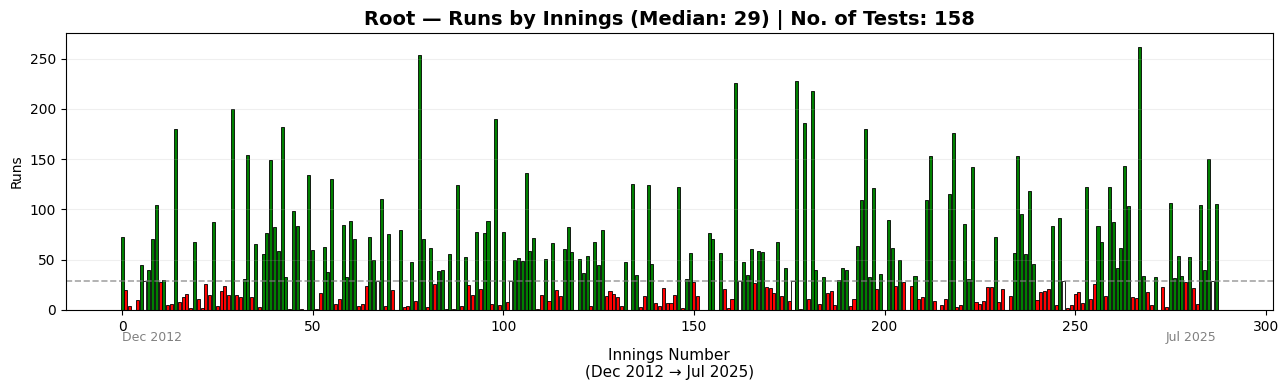

In [159]:
plot_player_bar('Root',player_dfs['Root'])


/var/folders/qx/d6vwfn4179979vr76dn4k3440000gn/T/ipykernel_35785/729812944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batted_df['Start Date'] = pd.to_datetime(batted_df['Start Date'], errors='coerce')


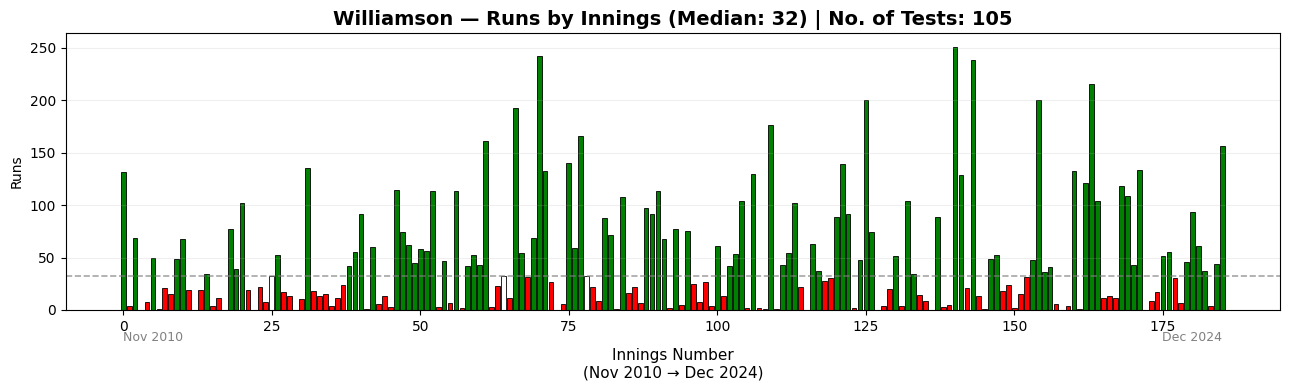

In [160]:
plot_player_bar('Williamson',player_dfs['Williamson'])


In [109]:
player_dfs['Kohli'].head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Test number,Unnamed: 14,Unnamed: 15,100s,50s,NO
0,4.0,13,10,1.0,0.0,40,5,caught,1,NaN,West Indies,Kingston,2011-06-20,1997,NaN,0,0,0,0
1,15.0,72,54,2.0,0.0,27.77,5,caught,3,NaN,West Indies,Kingston,2011-06-20,1997,NaN,Test # 1997,0,0,0
2,0.0,1,2,0.0,0.0,0,5,caught,1,NaN,West Indies,Bridgetown,2011-06-28,1998,NaN,Test # 1998,0,0,0
3,27.0,118,107,1.0,1.0,25.23,5,caught,3,NaN,West Indies,Bridgetown,2011-06-28,1998,NaN,Test # 1999,0,0,0
4,30.0,62,53,2.0,0.0,56.6,5,caught,2,NaN,West Indies,Roseau,2011-07-06,1999,NaN,Test # 2019,0,0,0


In [110]:
len(player_dfs['Smith']['Test number'].unique())

119

In [111]:
#check if Test number is empty is Smith data
player_dfs['Kohli']['Runs'].isnull().sum()

np.int64(9)

In [136]:
# Kohli data for each median score: how often does he go big
df = player_dfs['Smith']  # pick your player
med = df['Runs'].median()

# Only consider innings ≥ median
df_valid = df[df['Runs'] >= med]

bins = {
    'median_to_49': (df_valid['Runs'] < 50),
    'fifty_to_99': (df_valid['Runs'] >= 50) & (df_valid['Runs'] < 100),
    'hundred_to_149': (df_valid['Runs'] >= 100) & (df_valid['Runs'] < 150),
    'above_150': (df_valid['Runs'] >=150)
}

print(f"Median: {med:.0f}")
print(f"Total innings ≥ median: {len(df_valid)}\n")
print(f"Total innings: {len(df)}\n")

for label, mask in bins.items():
    count = mask.sum()
    pct = count / len(df_valid) if len(df_valid) > 0 else 0
    print(f"{label:<16} {count:>3}  ({pct:.2%})")


Median: 33
Total innings ≥ median: 107

Total innings: 224

median_to_49      28  (26.17%)
fifty_to_99       43  (40.19%)
hundred_to_149    27  (25.23%)
above_150          9  (8.41%)


In [163]:
25.25 + 8.41

33.66

In [113]:
# Kohli data for each median score: how often does he go big
df = player_dfs['Kohli']  # pick your player
med = df['Runs'].median()

# Only consider innings ≥ median
df_valid = df[df['Runs'] >= med]

bins = {
    'median_to_49': (df_valid['Runs'] < 50),
    'fifty_to_99': (df_valid['Runs'] >= 50) & (df_valid['Runs'] < 100),
    'hundred_to_149': (df_valid['Runs'] >= 100) & (df_valid['Runs'] < 150),
    'above_150': (df_valid['Runs'] >=150)
}

print(f"Median: {med:.0f}")
print(f"Total innings ≥ median: {len(df_valid)}\n")

for label, mask in bins.items():
    count = mask.sum()
    pct = count / len(df_valid) if len(df_valid) > 0 else 0
    print(f"{label:<16} {count:>3}  ({pct:.2%})")


Median: 23
Total innings ≥ median: 108

median_to_49      47  (43.52%)
fifty_to_99       31  (28.70%)
hundred_to_149    19  (17.59%)
above_150         11  (10.19%)


In [166]:
17.59 + 10.19

27.78

In [114]:
# Kohli data for each median score: how often does he go big
df = player_dfs['Root']  # pick your player
med = df['Runs'].median()

# Only consider innings ≥ median
df_valid = df[df['Runs'] >= med]

bins = {
    'median_to_49': (df_valid['Runs'] < 50),
    'fifty_to_99': (df_valid['Runs'] >= 50) & (df_valid['Runs'] < 100),
    'hundred_to_149': (df_valid['Runs'] >= 100) & (df_valid['Runs'] < 150),
    'above_150': (df_valid['Runs'] >=150)
}

print(f"Median: {med:.0f}")
print(f"Total innings ≥ median: {len(df_valid)}\n")

for label, mask in bins.items():
    count = mask.sum()
    pct = count / len(df_valid) if len(df_valid) > 0 else 0
    print(f"{label:<16} {count:>3}  ({pct:.2%})")


Median: 29
Total innings ≥ median: 148

median_to_49      43  (29.05%)
fifty_to_99       66  (44.59%)
hundred_to_149    23  (15.54%)
above_150         16  (10.81%)


In [164]:
15.54 + 10.81

26.35

In [115]:
# Kohli data for each median score: how often does he go big
df = player_dfs['Williamson']  # pick your player
med = df['Runs'].median()

# Only consider innings ≥ median
df_valid = df[df['Runs'] >= med]

bins = {
    'median_to_49': (df_valid['Runs'] < 50),
    'fifty_to_99': (df_valid['Runs'] >= 50) & (df_valid['Runs'] < 100),
    'hundred_to_149': (df_valid['Runs'] >= 100) & (df_valid['Runs'] < 150),
    'above_150': (df_valid['Runs'] >=150)
}

print(f"Median: {med:.0f}")
print(f"Total innings ≥ median: {len(df_valid)}\n")

for label, mask in bins.items():
    count = mask.sum()
    pct = count / len(df_valid) if len(df_valid) > 0 else 0
    print(f"{label:<16} {count:>3}  ({pct:.2%})")


Median: 32
Total innings ≥ median: 94

median_to_49      24  (25.53%)
fifty_to_99       37  (39.36%)
hundred_to_149    22  (23.40%)
above_150         11  (11.70%)


In [165]:
11.70 + 23.40

35.099999999999994

In [116]:
player_dfs['Smith'].loc[player_dfs['Smith']['Runs'] != 0, 'Runs'].mode()

0    6.0
Name: Runs, dtype: float64

In [117]:
player_dfs['Kohli'].loc[player_dfs['Kohli']['Runs'] != 0, 'Runs'].mode()

0    1.0
Name: Runs, dtype: float64

In [118]:
player_dfs['Williamson'].loc[player_dfs['Williamson']['Runs'] != 0, 'Runs'].mode()

0    4.0
Name: Runs, dtype: float64

In [119]:
player_dfs['Root'].loc[player_dfs['Root']['Runs'] != 0, 'Runs'].mode()

0    4.0
Name: Runs, dtype: float64

In [120]:
player_dfs['Root']['Runs'].value_counts()

Runs
0.0      13
4.0      10
11.0      8
5.0       8
1.0       7
         ..
67.0      1
200.0     1
37.0      1
125.0     1
105.0     1
Name: count, Length: 112, dtype: int64

In [121]:
player_dfs['Smith']['Runs'].value_counts()

Runs
0.0      11
6.0       9
5.0       6
7.0       6
17.0      6
         ..
21.0      1
239.0     1
76.0      1
102.0     1
3.0       1
Name: count, Length: 103, dtype: int64

In [122]:
player_dfs['Kohli']['Runs'].value_counts()

Runs
0.0      15
1.0       8
3.0       7
44.0      6
17.0      6
         ..
211.0     1
40.0      1
167.0     1
81.0      1
100.0     1
Name: count, Length: 92, dtype: int64

In [123]:
player_dfs['Williamson']['Runs'].value_counts()

Runs
0.0      11
4.0       8
1.0       7
2.0       6
13.0      6
         ..
108.0     1
16.0      1
97.0      1
75.0      1
156.0     1
Name: count, Length: 93, dtype: int64

In [161]:
import math
import numpy as np
import matplotlib.pyplot as plt

def plot_run_distribution(name, df, bins=20):
    """
    Histogram of runs with dotted lines for:
      - Batting Average (outs-based, rounded down)
      - Mean (rounded down)
      - Median
      - Mode
    Uses same logic as your printed calculation.
    """

    # Filter innings where batsman actually batted
    batted_df = df[df['Runs'].notna()]
    runs = batted_df['Runs']

    # Outs-based batting average
    outs = batted_df.shape[0] - batted_df['NO'].sum()
    avg = runs.sum() / outs if outs > 0 else 0
    avg_floor = math.floor(avg * 100) / 100

    # True average (mean)
    mean_val = runs.sum() / batted_df.shape[0] if batted_df.shape[0] > 0 else 0
    mean_floor = math.floor(mean_val * 100) / 100

    # Median & Mode
    median_val = runs.median()
    modes = runs.mode().sort_values().values

    # Plot histogram
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(runs, bins=bins, edgecolor='black', alpha=0.6)
    ax.set_title(f"{name} — Runs Distribution", fontsize=14, fontweight='bold')
    ax.set_xlabel("Runs")
    ax.set_ylabel("Frequency")
    ax.grid(alpha=0.2, axis='y')

    y_top = ax.get_ylim()[1]

    def mark(x, label, color):
        if x is None or np.isnan(x): return
        ax.axvline(x, linestyle='--', linewidth=1.4, color=color, label=label)
        ax.text(x, y_top * 0.92, f"{label}: {x:.2f}", rotation=90,
                va='top', ha='right', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.8))

    # Add all markers
    mark(avg_floor, "Average", "#2a9d8f")     # cricket average
    mark(mean_floor, "Mean", "#1f77b4")
    mark(median_val, "Median", "#ff7f0e")
    for i, m in enumerate(modes[:3]):
        mark(m, f"Mode{'' if len(modes)==1 else f' #{i+1}'}", "#d62728")

    ax.legend(loc='upper right', frameon=True)
    plt.tight_layout()
    plt.savefig(img_dir /f"{name}_runs_disribution.png", dpi=300, bbox_inches='tight', transparent=True)

    plt.show()


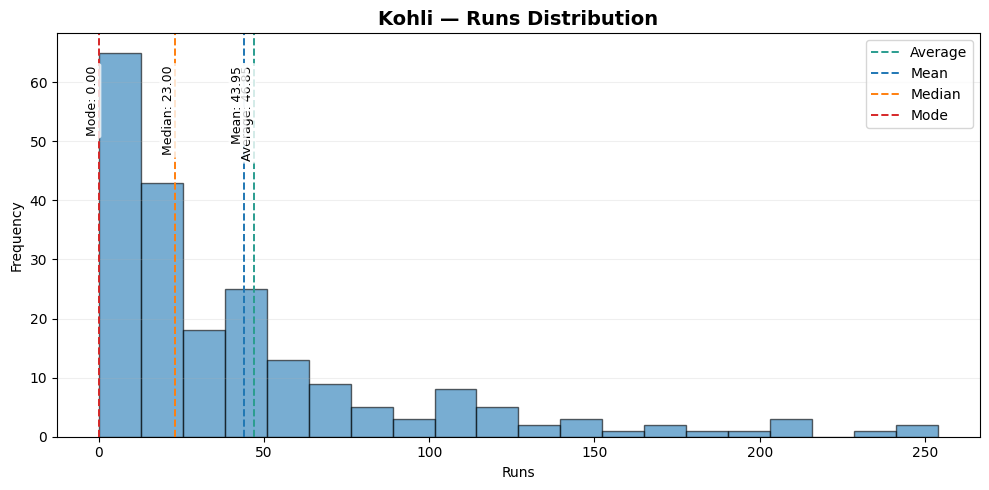

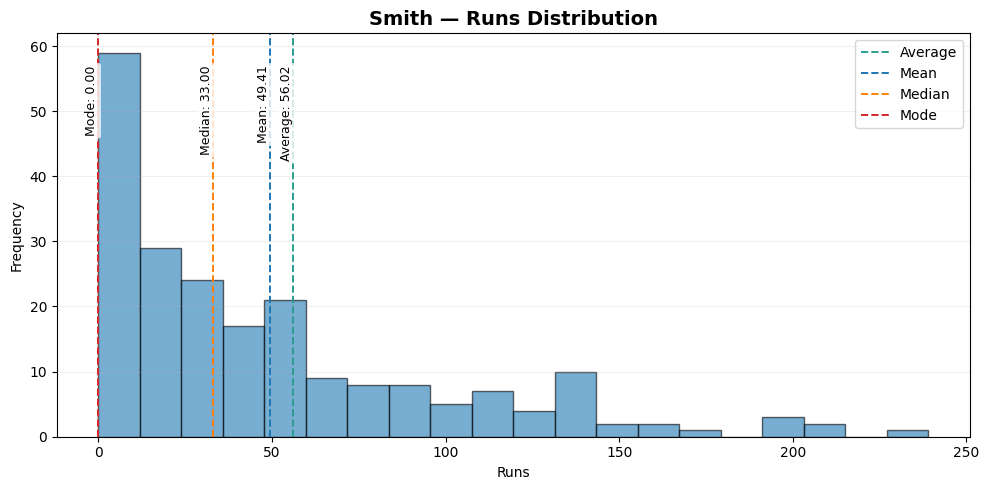

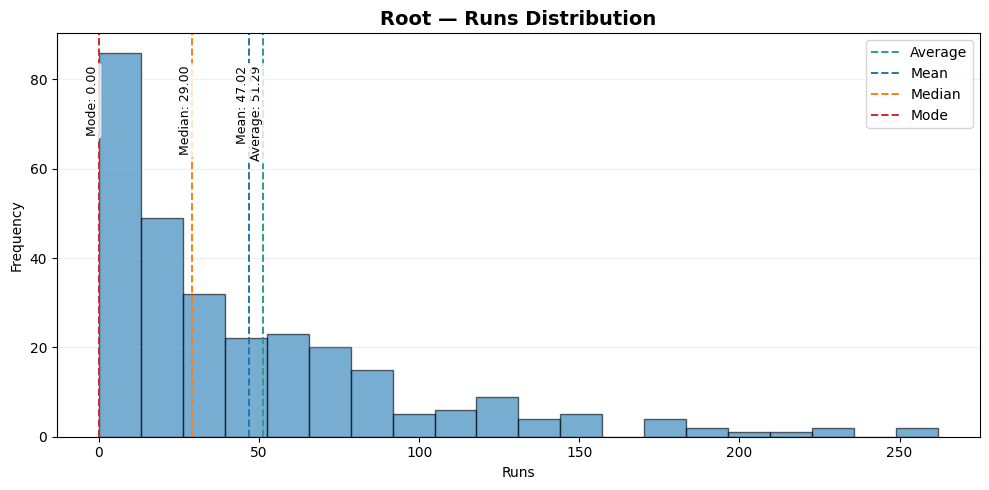

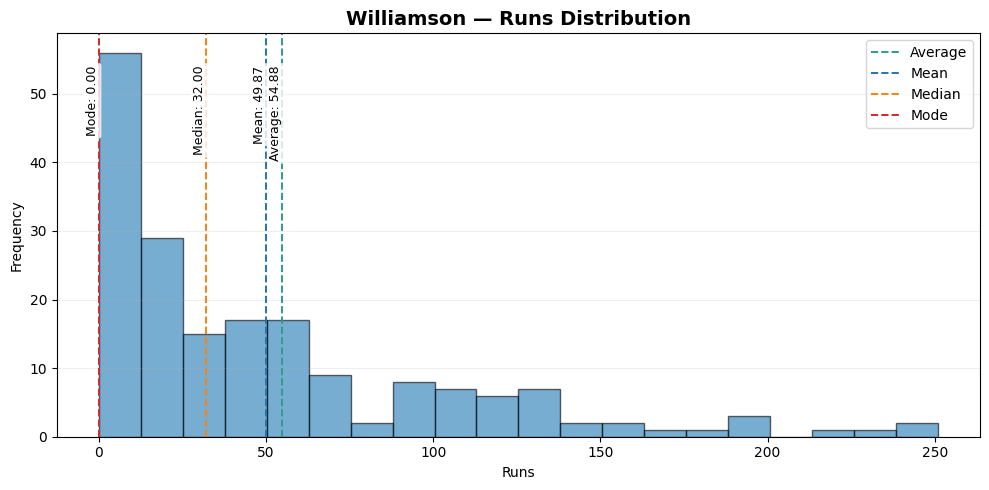

In [162]:
plot_run_distribution("Kohli", player_dfs["Kohli"])
plot_run_distribution("Smith", player_dfs["Smith"])
plot_run_distribution("Root", player_dfs["Root"])
plot_run_distribution("Williamson", player_dfs["Williamson"])

In [130]:
import pandas as pd

def get_form_streaks(df, player_name, min_len=3):
    """
    Streaks of innings with Runs >= player's median.
    Returns: Player, Start Date, End Date, Innings, Total Runs, Scores
    """
    # Choose date column
    date_col = 'Start Date' if 'Start Date' in df.columns else 'Start date'
    tmp = df.copy()

    # Coerce types
    tmp['Runs'] = pd.to_numeric(tmp['Runs'], errors='coerce')
    tmp[date_col] = pd.to_datetime(tmp[date_col], errors='coerce')

    # Keep only innings with a score (exclude DNB/NaN)
    tmp = tmp[tmp['Runs'].notna()].sort_values(date_col).reset_index(drop=True)

    if tmp.empty:
        return pd.DataFrame(columns=['Player','Start Date','End Date','Innings','Total Runs','Scores'])

    med = tmp['Runs'].median()
    tmp['InForm'] = tmp['Runs'] >= med

    streaks = []
    start_idx = None
    curr_scores = []

    for i, row in tmp.iterrows():
        if row['InForm']:
            if start_idx is None:
                start_idx = i
                curr_scores = []
            curr_scores.append(int(row['Runs']))
        else:
            if start_idx is not None:
                length = i - start_idx
                if length >= min_len:
                    seg = tmp.iloc[start_idx:i]
                    streaks.append({
                        'Player': player_name,
                        'Start Date': seg.iloc[0][date_col],
                        'End Date':   seg.iloc[-1][date_col],
                        'Innings':    length,
                        'Total Runs': int(sum(curr_scores)),
                        'Scores':     ', '.join(map(str, curr_scores))
                    })
                start_idx = None
                curr_scores = []

    # If a streak runs till the end
    if start_idx is not None:
        seg = tmp.iloc[start_idx:]
        length = len(seg)
        if length >= min_len:
            streaks.append({
                'Player': player_name,
                'Start Date': seg.iloc[0][date_col],
                'End Date':   seg.iloc[-1][date_col],
                'Innings':    length,
                'Total Runs': int(sum(curr_scores)),
                'Scores':     ', '.join(map(str, curr_scores))
            })

    out = pd.DataFrame(streaks)
    # Optional: pretty date format
    if not out.empty:
        out['Start Date'] = out['Start Date'].dt.date
        out['End Date']   = out['End Date'].dt.date
    return out


In [131]:
smith_streaks = get_form_streaks(player_dfs['Smith'], 'Smith')
kohli_streaks = get_form_streaks(player_dfs['Kohli'], 'Kohli')
root_streaks = get_form_streaks(player_dfs['Root'], 'Root')
williamson_streaks = get_form_streaks(player_dfs['Williamson'], 'Williamson')


In [170]:
kohli_streaks

,Player,Start Date,End Date,Innings,Total Runs,Scores
0,Kohli,2011-06-28,2011-11-22,4,172,"27, 30, 52, 63"
1,Kohli,2012-01-13,2012-01-24,3,235,"75, 44, 116"
2,Kohli,2012-08-23,2012-08-31,3,212,"58, 103, 51"
3,Kohli,2012-12-13,2013-03-14,5,345,"103, 107, 34, 67, 34"
4,Kohli,2013-11-14,2013-12-26,4,318,"57, 119, 96, 46"
5,Kohli,2014-12-26,2015-01-06,4,416,"169, 54, 147, 46"
6,Kohli,2015-12-03,2016-07-30,4,376,"44, 88, 200, 44"
7,Kohli,2016-11-09,2016-11-26,5,399,"40, 49, 167, 81, 62"
8,Kohli,2017-11-16,2017-12-02,4,610,"104, 213, 50, 243"
9,Kohli,2018-01-24,2018-08-09,5,318,"54, 41, 149, 51, 23"


In [ ]:
all_streaks = pd.concat([smith_streaks, kohli_streaks, root_streaks, williamson_streaks], ignore_index=True)


,Player,Start Date,End Date,Innings,Total Runs,Scores
0,Smith,2014-12-09,2014-12-17,3,347,"162, 52, 133"
1,Smith,2015-06-11,2015-07-16,6,592,"54, 199, 33, 33, 215, 58"
2,Smith,2015-12-26,2016-02-20,5,466,"134, 70, 71, 138, 53"
3,Smith,2016-11-24,2016-12-26,5,457,"59, 40, 130, 63, 165"
4,Smith,2017-12-02,2018-03-01,7,634,"40, 239, 76, 102, 83, 56, 38"
5,Smith,2019-08-01,2019-09-12,6,751,"142, 144, 92, 211, 82, 80"
6,Smith,2021-01-07,2021-01-15,4,303,"131, 81, 36, 55"
7,Smith,2022-03-04,2022-03-21,3,209,"78, 72, 59"
8,Smith,2022-12-17,2023-02-09,4,262,"36, 85, 104, 37"
9,Smith,2025-01-29,2025-06-11,3,338,"141, 131, 66"


In [146]:
# display all the values in the Runs column for Smith, as some are hidden by ...
clean_runs = player_dfs['Smith']['Runs'].dropna()
len(clean_runs)  # 212

212

In [147]:
sorted_runs = clean_runs.sort_values().reset_index(drop=True)


In [148]:
sorted_runs

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       2.0
17       2.0
18       2.0
19       2.0
20       3.0
21       4.0
22       4.0
23       4.0
24       4.0
25       5.0
26       5.0
27       5.0
28       5.0
29       5.0
30       5.0
31       6.0
32       6.0
33       6.0
34       6.0
35       6.0
36       6.0
37       6.0
38       6.0
39       6.0
40       7.0
41       7.0
42       7.0
43       7.0
44       7.0
45       7.0
46       8.0
47       8.0
48       8.0
49       8.0
50       8.0
51       9.0
52       9.0
53      10.0
54      10.0
55      10.0
56      11.0
57      11.0
58      11.0
59      12.0
60      12.0
61      12.0
62      13.0
63      13.0
64      14.0
65      14.0
66      15.0
67      16.0
68      16.0
69      16.0
70      16.0
71      17.0
72      17.0
73      17.0
74      17.0
75      17.0
76      17.0

In [149]:
sorted_runs.iloc[105], sorted_runs.iloc[106]


(np.float64(33.0), np.float64(33.0))